In [1]:
# CELL 0 — Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use("seaborn-v0_8-whitegrid")


/tmp/ipython-input-3577118552.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start="2021-01-01", periods=48, freq="M")


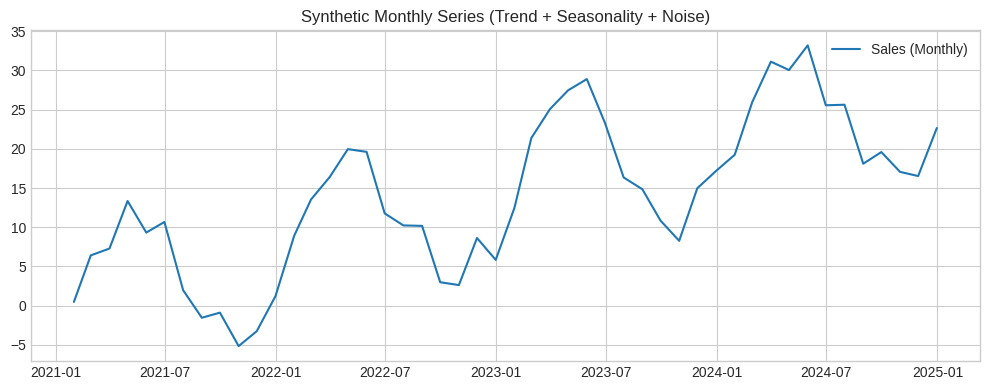

In [2]:
# CELL 1 — Create a time series `ts` (monthly, 4 years, with trend + yearly seasonality + noise)

# Synthetic but realistic monthly series (48 months)
idx = pd.date_range(start="2021-01-01", periods=48, freq="M")

# Components: linear trend + yearly seasonality + random noise
t = np.arange(48)
trend = 0.6 * t
seasonal = 10 * np.sin(2 * np.pi * t / 12)  # yearly (12-month) seasonality
noise = np.random.normal(scale=2.0, size=48)

ts = pd.Series(trend + seasonal + noise, index=idx, name="Sales")

# Quick peek
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ts, label="Sales (Monthly)")
ax.set_title("Synthetic Monthly Series (Trend + Seasonality + Noise)")
ax.legend()
plt.tight_layout()
plt.show()


In [3]:
# CELL 2 — Chronological split, fit ARIMA(1,1,1), get residuals

# Last 12 months as a simple holdout
train = ts.iloc[:-12]
test  = ts.iloc[-12:]

# Fit ARIMA on TRAIN only
model = ARIMA(train, order=(1,1,1))
fit = model.fit()

# Residuals from the fitted model (in-sample)
resid = fit.resid

print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -102.334
Date:                Sat, 22 Nov 2025   AIC                            210.668
Time:                        14:35:09   BIC                            215.334
Sample:                    01-31-2021   HQIC                           212.278
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4679      0.599      0.781      0.435      -0.707       1.643
ma.L1         -0.1822      0.615     -0.296      0.767      -1.388       1.024
sigma2        20.2236      6.339      3.190      0.0

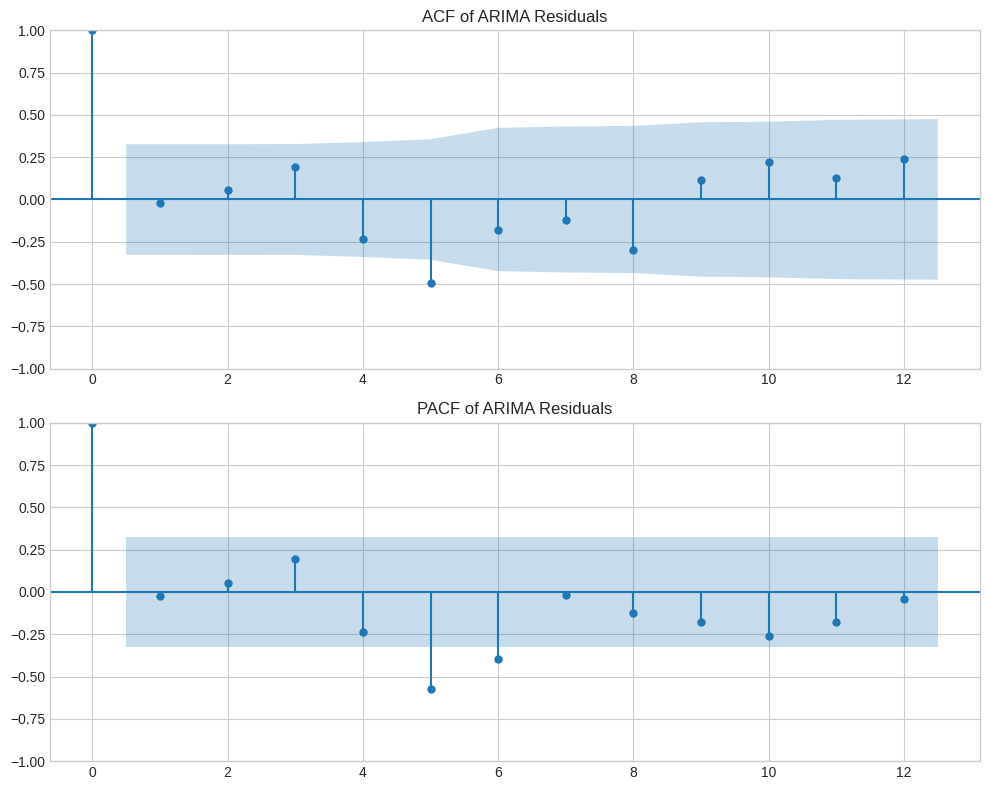

In [5]:
# CELL 3 — Residual ACF & PACF

fig, ax = plt.subplots(2, 1, figsize=(10,8))
plot_acf(resid, ax=ax[0], lags=12)
ax[0].set_title("ACF of ARIMA Residuals")

plot_pacf(resid, ax=ax[1], lags=12, method="ywm")
ax[1].set_title("PACF of ARIMA Residuals")

plt.tight_layout()
plt.show()


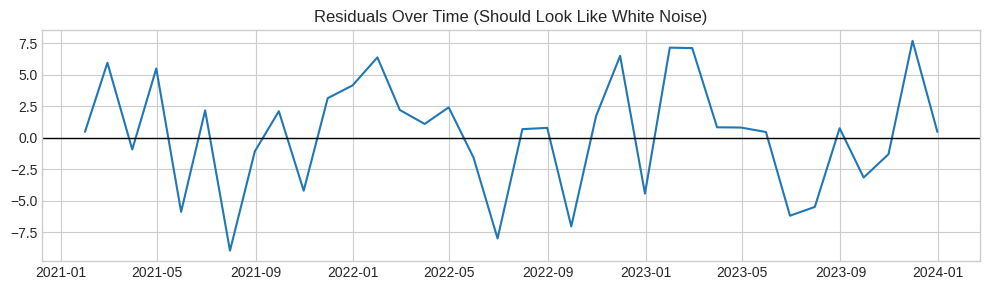

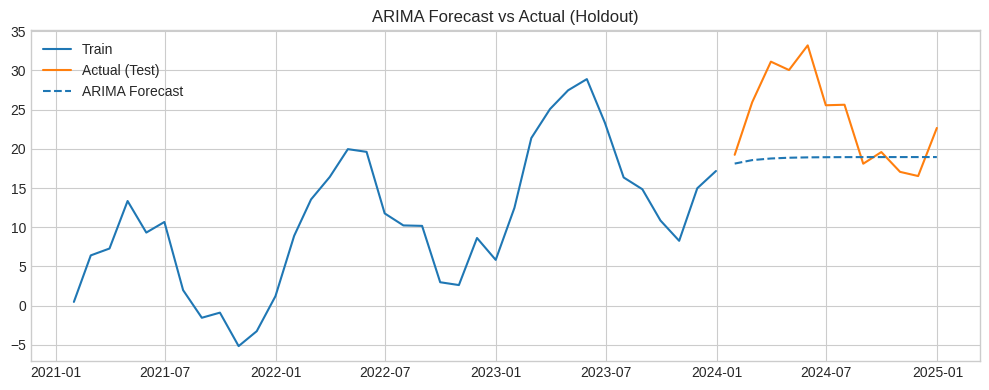

In [6]:
# CELL 4 — (Optional) Visual residual check & simple forecast plot

# Residuals over time (should look like random noise around 0)
plt.figure(figsize=(10,3))
plt.plot(resid)
plt.axhline(0, color="black", lw=1)
plt.title("Residuals Over Time (Should Look Like White Noise)")
plt.tight_layout()
plt.show()

# Forecast next 12 and compare visually
pred = fit.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test,  label="Actual (Test)", color="#ff7f0e")
plt.plot(pred,  label="ARIMA Forecast", color="#1f77b4", ls="--")
plt.title("ARIMA Forecast vs Actual (Holdout)")
plt.legend()
plt.tight_layout()
plt.show()
